In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 模擬版資料做 SVM(圖形辨識)

In [2]:
x = np.array([[6,6] , [10,8] , [3,7] , [8,7]])

In [3]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [4]:
x[:,0]

array([ 6, 10,  3,  8])

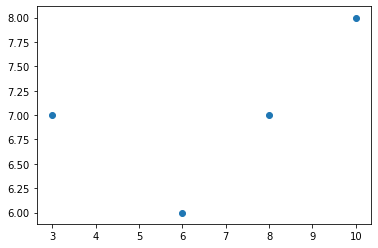

In [5]:
plt.scatter(x[:,0] , x[:,1])

In [6]:
y = np.array([1,2,1,2])

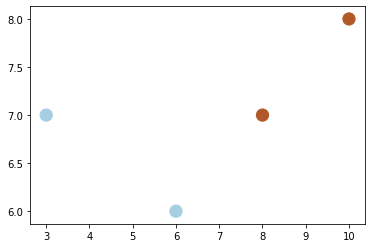

In [7]:
plt.scatter(x[:,0] , x[:,1] , c=y , cmap='Paired' , s=150)

## Step 1. 打開函數學習機

In [8]:
from sklearn.svm import SVC

In [9]:
clf = SVC(gamma='auto') #gamma="auto" 是為了消除警告

## Step 2.學習

In [10]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step 3.預測

In [11]:
y_predict = clf.predict(x)

In [12]:
y_predict

array([1, 2, 1, 2])

In [13]:
y

array([1, 2, 1, 2])

In [14]:
xr = np.random.rand(100)*7+3 #x軸的範圍3~10
yr = np.random.rand(100)*2+6 #y軸的範圍6~8

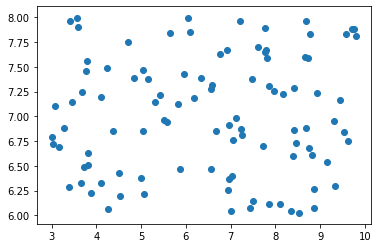

In [15]:
plt.scatter(xr,yr)

In [16]:
print('X',xr[:5])
print('Y',yr[:5])

X [9.79379781 8.41877204 8.52906508 4.51401127 3.07320068]
Y [7.8123374  7.28373559 6.02810008 6.43125402 7.10490674]


In [17]:
np.c_[xr,yr] #xy分組合在一起

array([[9.79379781, 7.8123374 ],
       [8.41877204, 7.28373559],
       [8.52906508, 6.02810008],
       [4.51401127, 6.43125402],
       [3.07320068, 7.10490674],
       [7.71429267, 6.70160707],
       [8.85857757, 6.07806511],
       [8.67917143, 6.88525148],
       [8.82188805, 6.61259897],
       [3.03063243, 6.72030128],
       [9.71333636, 7.88635587],
       [6.94684925, 6.26020129],
       [6.91141445, 7.66780715],
       [7.03870419, 6.39479556],
       [7.23943969, 6.86940496],
       [4.36127008, 6.8483921 ],
       [4.84718383, 7.3920012 ],
       [3.81055413, 6.62864564],
       [3.59853944, 7.89908644],
       [7.25166326, 6.80968042],
       [5.00268213, 6.37743773],
       [5.05070298, 7.46956399],
       [6.17033495, 7.18488766],
       [9.52575223, 6.84370613],
       [3.80741657, 6.50914668],
       [8.3832523 , 6.60381444],
       [8.73639331, 7.5877753 ],
       [9.14672191, 6.53965758],
       [8.09302128, 6.11943674],
       [8.66163497, 7.59902508],
       [6.

### 資料整理

原本

$$x_r = [x_1 , x_2 , x_3 , ...]$$

$$y_r = [y_1 , y_2 , y_3 , ...]$$

我們希望變成:

$$[[x_1,y_1] , [x_2,y_2] , [x_3,y_3] , ...]$$

可以用

    np.c_[xr,yr]

達成!

In [18]:
X = np.c_[xr,yr]

In [19]:
Y = clf.predict(X)

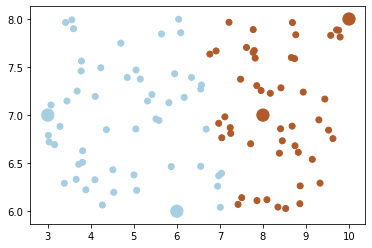

In [20]:
plt.scatter(x[:,0] , x[:,1] , c=y , cmap='Paired' , s=150)
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap='Paired')

### 結果呈現

In [21]:
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8,50)

In [22]:
X = np.c_[x_list,y_list]

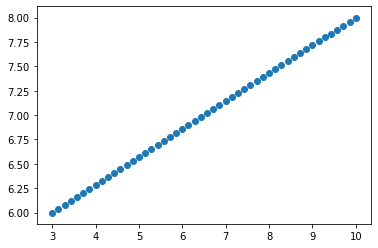

In [23]:
plt.scatter(X[:,0] , X[:,1]) #對角線

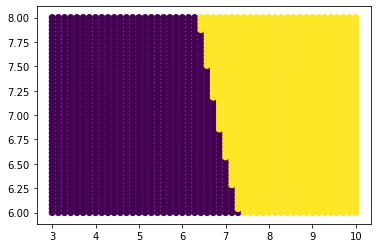

In [24]:
X,Y = np.meshgrid(x_list,y_list) #把xy全部點出來
P = np.c_[X.ravel() , Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0] , P[:,1] , c=C)

# 插播:contour 用法

In [25]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X,Y = np.meshgrid(xL,yL)

In [26]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [27]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [28]:
Z = np.random.randint(1,3,(4,4))

In [29]:
Z

array([[2, 1, 2, 1],
       [2, 1, 1, 2],
       [2, 2, 2, 1],
       [1, 2, 1, 2]])

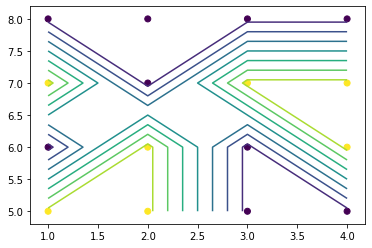

In [30]:
Z = np.random.randint(1,3,(4,4))
plt.contour(X,Y,Z) #等高線
plt.scatter(X.ravel() , Y.ravel() , c=Z.ravel())

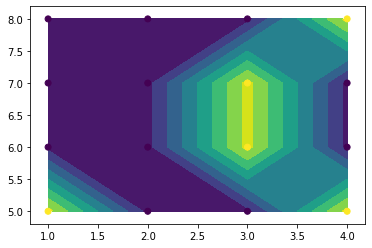

In [31]:
Z = np.random.randint(1,3,(4,4))
plt.contourf(X,Y,Z) #加f
plt.scatter(X.ravel() , Y.ravel() , c=Z.ravel())

# 資料視覺化終極版

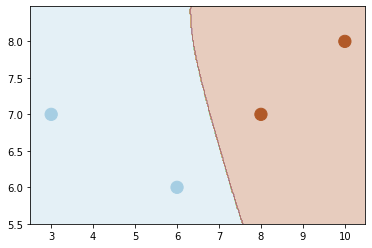

In [32]:
x_arr = np.arange(2.5,10.5,0.02)
y_arr = np.arange(5.5,8.5,0.02)
X,Y = np.meshgrid(x_arr,y_arr)
P = np.c_[X.ravel() , Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X , Y , Z , cmap='Paired' , alpha=0.3)
plt.scatter(x[:,0] , x[:,1] , c=y , cmap='Paired' , s=150)

# 鳶尾花數據庫

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

In [35]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
x = iris.data
y = iris.target

In [37]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [38]:
y[:5]

array([0, 0, 0, 0, 0])

In [39]:
X = x[:, :2] #每列都要，前兩行
Y = y

In [40]:
len(X)

150

# 區分訓練資料、測試資料

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train , x_test , y_train ,y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

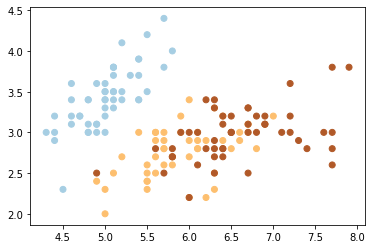

In [43]:
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap='Paired')

## Step 1.開一台函數學習機

In [44]:
clf = SVC(gamma='auto')

## Step 2.訓練

In [45]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step 3.預測

In [46]:
y_predict = clf.predict(x_test)

In [47]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [48]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [49]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

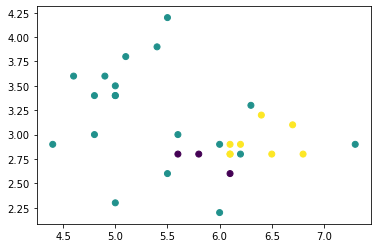

In [50]:
plt.scatter(x_test[:,0] , x_test[:,1] , c=y_predict-y_test)

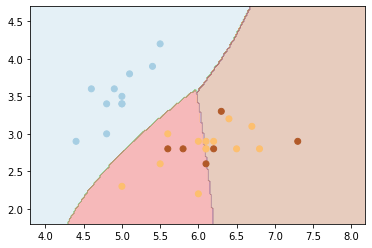

In [51]:
x0 = np.arange(3.8,8.2,0.02)
y0 = np.arange(1.8,4.7,0.02)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel() , ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm , ym , Z , cmap='Paired' , alpha=0.3)

plt.scatter(x_test[:,0] , x_test[:,1] , cmap='Paired' , c=y_test)

#### [指定作業]鳶尾花預測改進